In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ply

In [3]:
performance = pd.read_csv('C:/Users/VISHU/3D Objects/Machine Learning/Datasets/Performance-Testing.csv')
performance.shape

(54808, 13)

In [4]:
performance.info()    # previous year-rating are missing...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [5]:
X_data = performance.drop(columns='is_promoted')
Y_data = performance[['is_promoted']]

In [8]:
X_data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class PreviousYearRating(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Imputer = SimpleImputer(strategy="mean")
        X['previous_year_rating'] = Imputer.fit_transform(X[['previous_year_rating']])
        return X

In [17]:
from sklearn.preprocessing import OneHotEncoder  
class Education(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        Encoder = OneHotEncoder()      # Encoder to create the One Hot Encoding...
        matrix = Encoder.fit_transform(X[['education']]).toarray()    # Converting to array...
        column_names = ["Master's & above", "Bachelor's", "N", "Below Secondary"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]    # Assigning to columns created as zero or one...
        return X     # return statement to provide the updated dataframe...

In [20]:
class DropEmpty(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns='N')    # Dropping the column with empty values...

In [21]:
from sklearn.pipeline import Pipeline
Pipe = Pipeline([
    ("Previous", PreviousYearRating()),
    ("Educator", Education()),
    ("DropEmpty", DropEmpty())
])
X_data = Pipe.fit_transform(X_data)
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  Master's & above      54808 non-null  float64
 13  Bachelor's            54808 non-null  float64
 14  Below Secondary       54808 non-null  float64
dtypes: float64(4), int6

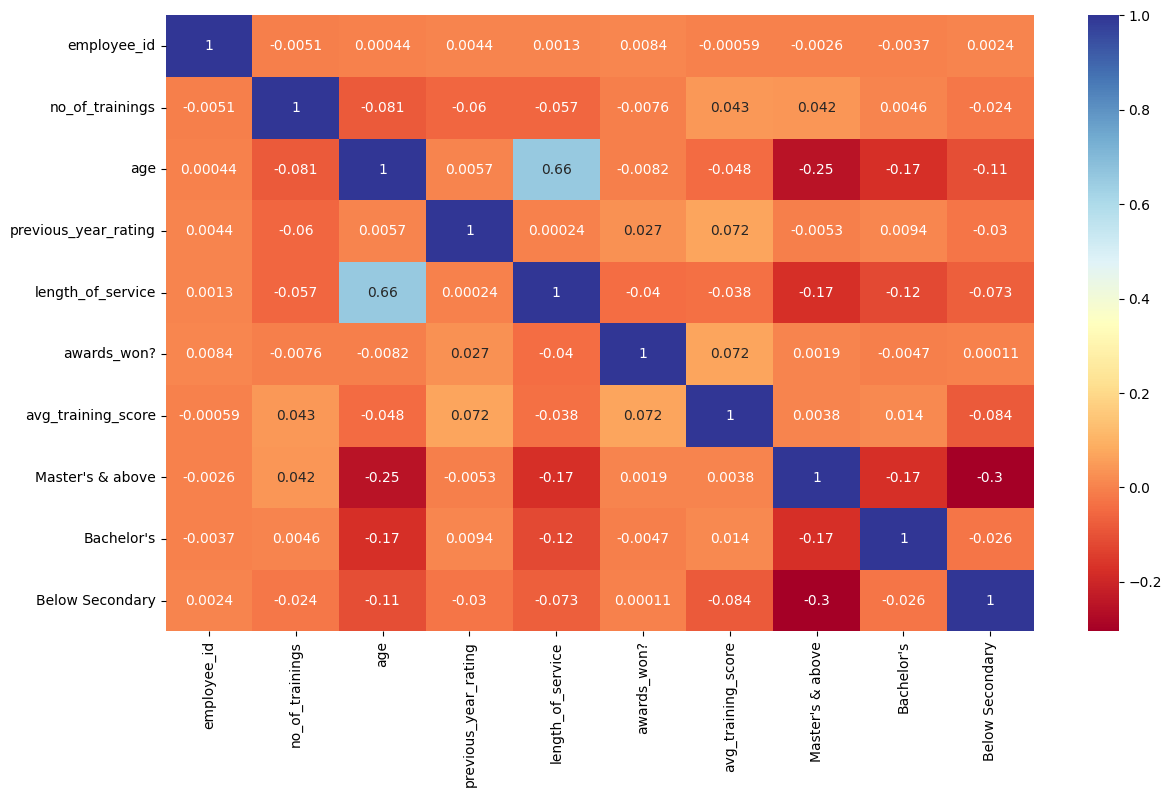

In [29]:
plt.figure(figsize=(14, 8))
sns.heatmap(X_data.corr(), cmap="RdYlBu", annot=True)
plt.show()

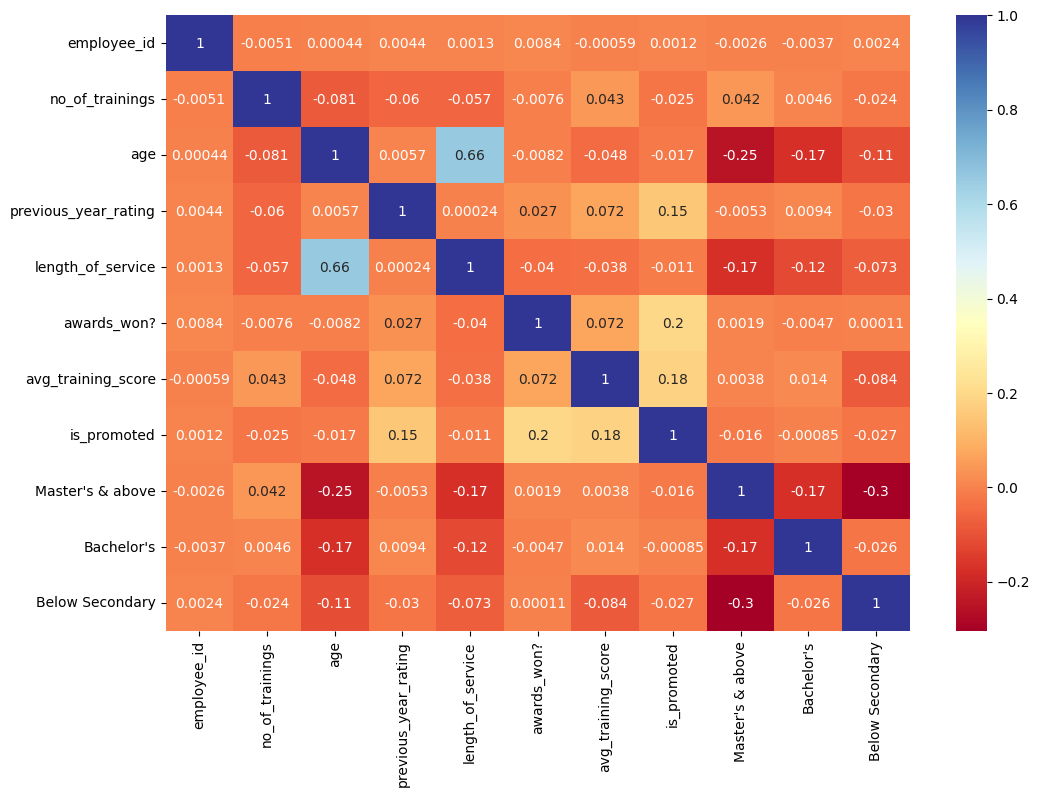

In [36]:
performance = Pipe.fit_transform(performance)
plt.figure(figsize=(12, 8))
sns.heatmap(performance.corr(), cmap="RdYlBu", annot=True)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_data, Y_data, test_size=0.25)

(13702, 1)

In [51]:
Xtrain['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  5,  8,  7,  6,  9, 10], dtype=int64)

In [53]:
Ytrain['is_promoted'].unique()

array([0, 1], dtype=int64)

In [ ]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(Xtrain, Ytrain)

In [ ]:
Ypred = logic.predict(Xtest)